In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Size (sqft) 	Number of Bedrooms	Number of floors	Age of Home	    Price (1000s dollars)
#    2104	              5	                  1	                 45	             460
#    1416	              3                   2         	     40	             232
#    852	              2	                  1	                 35	             178

In [3]:
X_train = np.array([[2104, 5, 1, 45],[1416, 3, 2, 40],[852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
m,n=X_train.shape

In [4]:
X_mean=np.mean(X_train)
X_mean

375.5

In [5]:
X_sigma=np.std(X_train)
X_sigma

675.195465525848

In [6]:
x_normalised=(X_train-X_mean)/X_sigma
y_normalised=(y_train-np.mean(y_train))/(np.std(y_train))

In [7]:
# plt.scatter(X_train,y_train)
# plt.show()
# w=np.zeros(4)
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
w=np.zeros(n)
b=0.

In [8]:
# j=1/2m(sum(y_pred-y_act)**2 --> cost

# j=1/2m(w*x_train+b-y_act)^2
# dj_dw=(1/m)*x_train(w*x+b-y)
# dj_db=(1/m)(w*x+b-y)
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros(n)
    dj_db=0.0
    for i in range(m):
        error=(np.dot(x[i],w)+b)-y[i]
        for j in range (n):
            dj_dw[j]=dj_dw[j]+error*x[i,j]        
        dj_db=dj_db+error
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db
    #Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x_normalised, y_normalised, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [1310.31842916 -450.97542295 -453.39724089 -406.54766355]
dj_dw at initial w,b: 
 818.1698637666497


In [9]:
def compute_cost(x_normalised,y_normalised,w,b):
    m=x_normalised.shape[0]
    cost=0.0
    for i in range(m):
        f_wb=np.dot(x_normalised[i],w)
        cost=cost+(f_wb+b-y_normalised[i])**2
    return cost/(2*m)

In [10]:
def gradient_descent(x,y,w,b,a,compute_gradient,iterations):
    # temp_w=w-a*dj_dw , a= learning rate
    # temp_b=b-a*dj_db
    # initial_w=0
    # initial_b=0
    cost_hist=[]
    # m=np.size(x_train)
    for i in range(iterations):     
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-a*dj_dw
        b=b-a*dj_db
        if i<10000:
            cost_hist.append(compute_cost(x,y,w,b))
        if i%100==0:
            print("iterations",i,"  cost",cost_hist[i])    
    return w,b,cost_hist

In [11]:
iterations=500
w_final,b_final,cost_history=gradient_descent(x_normalised,y_normalised,w,b,0.1,compute_gradient,iterations)
print("****************************************************************************************")
print(w_final,"  ",b_final)

iterations 0   cost 0.45532634710464065
iterations 100   cost 0.04389724242709412
iterations 200   cost 0.03972499187962585
iterations 300   cost 0.039681223278879324
iterations 400   cost 0.03968032260402606
****************************************************************************************
[1.25954978 0.60651163 0.58906617 0.55608995]    -1.080986655911782


In [12]:
def predictions(x_normalised,w,b):
    y_pred=np.dot(x_normalised,w)+b
    return y_pred
prediction=predictions(x_normalised,w_final,b_final)
prediction

array([ 1.2117216 , -0.07675662, -1.13476447])

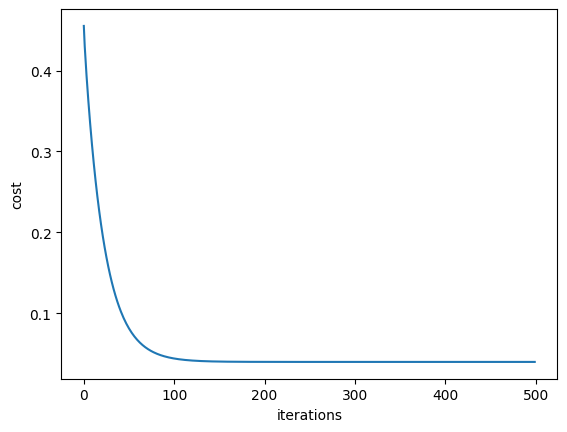

In [13]:
# plt.plot(y_train,prediction,label='our prediction')
# # plt.scatter(X_train,y_train,label='training data',color='red')
# plt.legend()
# plt.show()
# iterations=1000
range=np.arange(0,iterations)
plt.plot(range,cost_history)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

In [14]:
error=(np.sum(np.abs(prediction-y_normalised)))/(X_train.shape[0])
accuracy=1-error
accuracy
# error

# print("accuracy",(1-error)*100)

0.7348502252310245